# C:\sebin\lab\ecg\ecg_data_wfdb\guess\philps_test01.ipynb 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

import tensorflow as tf
import keras as kr
from sklearn.model_selection import train_test_split

import os 
from os import getcwd
from os.path import dirname,abspath
import pathlib as pl

import sys

home_path = "C:\\sebin\\lab\\ecg"
git_path = home_path+"\\ecg_data_wfdb"

sys.path.append(git_path)
from use.segment.pick import random_ecg
from use.segment.open import ecgtodf
from use.tensor.input import x_tensor_input,y_tensor_input

from sklearn.preprocessing import MinMaxScaler

In [10]:
def to_mixmax_tensor(x):
    
    record = x.to_numpy()
    t_record = record.T

    scaler = MinMaxScaler()
    scaler.fit(t_record)

    after_record = scaler.transform(t_record).T


    record = pd.DataFrame(after_record)
    x=x_tensor_input(record)


    return x

# 1. import data
----

In [2]:
test_folder = abspath("C:\sebin\lab\ecg\save\philip")

In [3]:
test_data = pd.DataFrame(ecgtodf(test_folder,288))

0_1.csv
0_2.csv
0_3.csv
0_4.csv
0_5.csv
0_6.csv
0_7.csv
0_8.csv
100_1.csv
100_2.csv
100_3.csv
100_4.csv
100_5.csv
100_6.csv
100_7.csv
101_1.csv
101_10.csv
101_2.csv
101_3.csv
101_4.csv
101_5.csv
101_6.csv
101_7.csv
101_8.csv
101_9.csv
102_1.csv
102_10.csv
102_11.csv
102_12.csv
102_2.csv
102_3.csv
102_4.csv
102_5.csv
102_6.csv
102_7.csv
102_8.csv
102_9.csv
103_1.csv
103_2.csv
103_3.csv
103_4.csv
103_5.csv
103_6.csv
103_7.csv
103_8.csv
103_9.csv
104_1.csv
104_2.csv
104_3.csv
104_4.csv
104_5.csv
104_6.csv
104_7.csv
104_8.csv
105_1.csv
105_2.csv
105_3.csv
105_4.csv
105_5.csv
105_6.csv
105_7.csv
105_8.csv
106_1.csv
106_10.csv
106_11.csv
106_12.csv
106_2.csv
106_3.csv
106_4.csv
106_5.csv
106_6.csv
106_7.csv
106_8.csv
106_9.csv
107_0.csv
107_1.csv
107_2.csv
107_3.csv
107_4.csv
107_5.csv
107_6.csv
107_7.csv
107_8.csv
107_9.csv
108_1.csv
108_10.csv
108_11.csv
108_2.csv
108_3.csv
108_4.csv
108_5.csv
108_6.csv
108_7.csv
108_8.csv
108_9.csv
109_0.csv
109_1.csv
109_10.csv
109_2.csv
109_3.csv
109_4.

In [4]:
test_data.shape

(1455, 288)

# 2. check data
---

In [5]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,-68.229130,-68.927214,-71.778346,-71.297538,-69.379968,-68.338158,-69.916081,-69.410796,-72.852449,-72.621904,...,-89.859574,-90.154505,-88.962479,-87.819363,-89.196943,-88.887040,-91.809888,-92.138556,-90.379545,-87.511747
1,-93.952993,-96.174644,-96.483817,-100.000900,-99.630946,-97.205191,-94.892342,-95.476867,-97.486519,-98.482984,...,-74.755903,-76.677218,-77.024393,-76.636980,-74.094222,-75.763290,-77.770054,-80.523376,-80.131566,-77.719350
2,-87.710962,-88.002881,-85.346902,-82.500140,-84.249681,-85.081153,-88.265751,-88.127571,-85.833400,-83.277421,...,-75.088379,-73.707894,-75.522001,-76.583234,-79.173955,-79.792978,-77.085799,-77.702418,-78.558381,-78.903252
3,-84.837820,-86.669715,-86.280042,-84.735534,-83.398787,-82.881314,-84.858403,-86.787723,-86.219190,-84.994840,...,-54.855906,-55.172215,-54.088007,-53.979763,-54.549774,-56.289891,-56.710144,-53.570561,-52.783360,-53.623922
4,-62.415672,-63.107147,-65.535755,-66.889869,-67.268046,-65.114042,-64.668896,-65.563771,-65.065823,-67.601638,...,-43.966424,-46.747313,-46.259712,-44.691452,-43.908263,-44.871672,-46.820699,-48.842905,-48.015726,-45.809190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,-257.485202,-258.142876,-257.961478,-257.433208,-256.020003,-257.313219,-256.613517,-256.588552,-256.312520,-256.147628,...,-251.372655,-251.995751,-250.861884,-251.027939,-250.000967,-249.941122,-251.026840,-251.748806,-250.744520,-250.243861
1451,-250.015951,-249.972332,-250.095555,-249.622317,-248.017717,-246.483825,-244.178570,-247.050890,-247.437039,-247.387321,...,-249.890303,-247.620539,-249.556368,-247.838422,-245.120443,-246.005720,-246.676515,-246.466119,-247.931403,-245.076949
1452,-247.931403,-245.076949,-245.937679,-245.901043,-246.112562,-246.858311,-247.888183,-241.529915,-242.227275,-246.627641,...,-244.653532,-246.323092,-240.193649,-243.482060,-242.054026,-241.875341,-241.194859,-242.489874,-242.697510,-243.312682
1453,-238.792152,-239.489398,-239.467316,-237.745813,-236.964814,-237.016628,-236.956460,-237.527253,-239.124791,-238.492003,...,-243.092233,-242.929489,-243.117237,-241.414109,-240.239010,-243.168738,-244.920128,-242.245066,-241.684016,-243.921428


In [7]:
test_data.shape

(1455, 288)

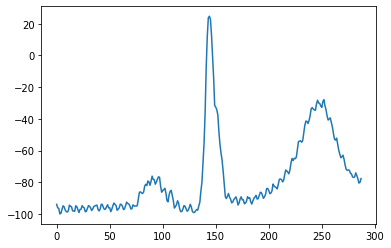

In [8]:
plt.plot(test_data.iloc[1])

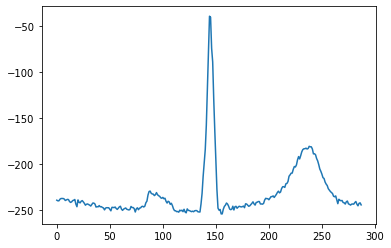

In [9]:
plt.plot(test_data.iloc[-2])

# 3. mix-max

In [11]:
test_data = to_mixmax_tensor(test_data)

In [12]:
print(test_data.shape)

(1455, 288, 1)


In [13]:
test_data

array([[[0.46362689],
        [0.45804169],
        [0.43523046],
        ...,
        [0.27233332],
        [0.28640674],
        [0.30935131]],

       [[0.04849672],
        [0.03068184],
        [0.02820265],
        ...,
        [0.15618563],
        [0.15932746],
        [0.17867044]],

       [[0.07495253],
        [0.0725917 ],
        [0.09407135],
        ...,
        [0.15589447],
        [0.14897206],
        [0.14618298]],

       ...,

       [[0.0330125 ],
        [0.04623273],
        [0.04224631],
        ...,
        [0.05821462],
        [0.05725297],
        [0.05440384]],

       [[0.06948348],
        [0.06623639],
        [0.06633922],
        ...,
        [0.05340314],
        [0.05601597],
        [0.04559627]],

       [[0.03821274],
        [0.04266235],
        [0.03864174],
        ...,
        [0.11788492],
        [0.10987155],
        [0.10969872]]])

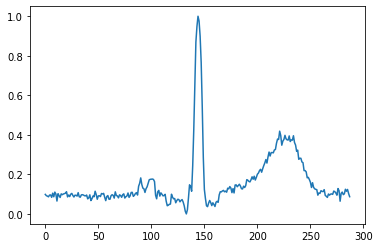

In [15]:
plt.plot(test_data[20])

# 4. model run

In [16]:
model = kr.models.load_model(git_path+"\\test\\02\\07\\model02.h5")

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 286, 8)            32        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 143, 8)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 141, 16)           400       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 70, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 68, 32)            1568      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 34, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 32, 32)            3

In [18]:
predict = model.predict(test_data)

In [19]:
print(predict)

[[9.57414150e-01 4.25301939e-02 9.91001836e-10 5.56593186e-05
  5.20102929e-14]
 [9.99679089e-01 1.75454305e-04 6.23974927e-07 1.44853591e-04
  1.96777621e-19]
 [9.99847054e-01 1.46016519e-05 1.02772538e-06 1.37203257e-04
  1.28939895e-16]
 ...
 [9.99262273e-01 2.52084195e-04 2.35070140e-11 4.85645141e-04
  8.57794253e-24]
 [9.95709419e-01 3.57250647e-05 1.08187875e-10 4.25485941e-03
  7.88055952e-23]
 [9.93755817e-01 7.87230965e-04 2.06197925e-09 5.45699010e-03
  6.50903711e-23]]


# 5. predict fun
-----

In [30]:
output = []

In [32]:
mark = []
for i in range(5):
    mark.append([])

In [33]:
for i in range(len(predict)):
    v = np.argmax(predict[i])
    print(v)

    
    output.append(np.argmax(predict[i]))
    mark[v].append(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
3
3
2
3
3
3
0
3
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
1
1
1
0
0
0
0


# 6. predict check
----

## 1. 개수


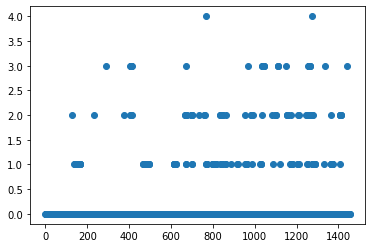

In [37]:
plt.plot(output,"o")

In [43]:
for i in range(5):
    print(output.count(i))

1250
114
57
32
2


In [44]:
mark

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  130,
  131,
  132,
  133,
  134,
  136,
  137,
  138,
  140,
  141,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  168,
  169,
  170,
  171,
  172,
  17

## 2. one check

In [41]:
output[20]

0

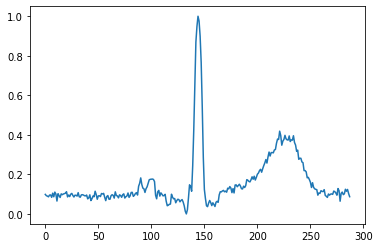

In [38]:
plt.plot(test_data[20])

## 3. export

number = [0,1,2,3,4]


label = ['N','S','V','F','Q']

In [56]:
re =  test_data.flatten().reshape((1455,288))
re = pd.DataFrame(re)

In [58]:
re

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,0.463627,0.458042,0.435230,0.439077,0.454419,0.462755,0.450130,0.454173,0.426637,0.428481,...,0.290567,0.288207,0.297744,0.306890,0.295868,0.298348,0.274963,0.272333,0.286407,0.309351
1,0.048497,0.030682,0.028203,0.000000,0.002967,0.022418,0.040964,0.036277,0.020162,0.012172,...,0.202434,0.187027,0.184243,0.187350,0.207739,0.194356,0.178264,0.156186,0.159327,0.178670
2,0.074953,0.072592,0.094071,0.117094,0.102945,0.096221,0.070466,0.071583,0.090137,0.110808,...,0.177035,0.188199,0.173528,0.164946,0.143994,0.138988,0.160881,0.155894,0.148972,0.146183
3,0.107120,0.092324,0.095472,0.107947,0.118743,0.122923,0.106954,0.091371,0.095963,0.105852,...,0.349280,0.346725,0.355482,0.356356,0.351752,0.337697,0.334303,0.359661,0.366019,0.359230
4,0.072634,0.067468,0.049327,0.039212,0.036387,0.052477,0.055802,0.049118,0.052837,0.033895,...,0.210447,0.189674,0.193317,0.205031,0.210882,0.203685,0.189126,0.174020,0.180199,0.196682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,0.046629,0.043572,0.044415,0.046871,0.053441,0.047429,0.050682,0.050798,0.052081,0.052847,...,0.075045,0.072148,0.077419,0.076647,0.081422,0.081700,0.076653,0.073296,0.077965,0.080292
1451,0.053858,0.054060,0.053490,0.055682,0.063113,0.070218,0.080894,0.067591,0.065803,0.066033,...,0.054440,0.064953,0.055987,0.063944,0.076532,0.072432,0.069325,0.070300,0.063513,0.076734
1452,0.033012,0.046233,0.042246,0.042416,0.041436,0.037982,0.033213,0.062661,0.059431,0.039051,...,0.048194,0.040461,0.068849,0.053619,0.060233,0.061061,0.064212,0.058215,0.057253,0.054404
1453,0.069483,0.066236,0.066339,0.074356,0.077993,0.077752,0.078032,0.075374,0.067934,0.070881,...,0.049458,0.050216,0.049341,0.057273,0.062745,0.049102,0.040945,0.053403,0.056016,0.045596


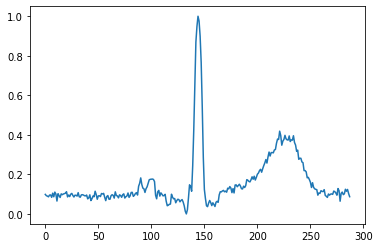

In [61]:
plt.plot(re.iloc[20])

In [68]:
output_path = abspath("C:\sebin\lab\ecg\\to_data")

In [69]:
output_csv = output_path + "\\" + "csv"
output_img = output_path + "\\" + "img"

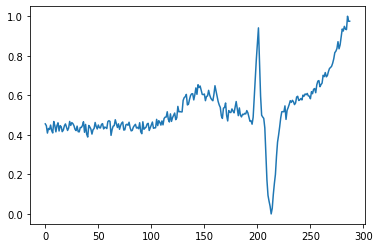

In [74]:
for i in range(len(mark)):
    for index in mark[i]:
        ecg = re.iloc[index]
        
        path = str(i)+"_"+str(index)
        
        ecg.to_csv(output_csv+"\\"+path+".csv",index=False, header=False)

        plt.cla()
        plt.plot(ecg)
        plt.savefig(output_img+"\\"+path+".jpg")